### Segundo trabalho computacional

O primeiro passo para a resolução do problema de Dirichlet é encontrar as condições de contorno no retângulo. No problema dado, o retângulo é unitário em $(x,y)$.

Portanto, obtemos as seguintes condições:

$$
u(x,0) = cos(\pi x) \\
u(x,1) = -cos(\pi x) \\
u(0,y) = cos(\pi y) \\
u(1,y) = -cos(\pi y)
$$

Vamos deduzir a $f(x,y)$. Temos:

$$
u_{x} = -\pi sin(\pi x) cos(\pi y) \\
u_{y} = -\pi cos(\pi x) sin(\pi y) \\
$$

Daí, temos:

$$
u_{xx} = u_{yy} = -\pi^2 cos(\pi x) cos(\pi y)
$$

Daí, segue que:

$$
f(x,y) = -2 \pi^2 cos(\pi x) cos(\pi y)
$$

Inicialmente, vamos utilizar o esquema de 2ª ordem básico:

$u_{ij} = \dfrac{1}{4}( u_{i+1, j} + u_{i-1, j} + u_{i,j+1} + u_{i,j-1} - h^2f_{i,j})$

A dedução desse esquema foi feita em sala de aula (virtual), e tem como intuição o uso de aproximações de diferenças finitas centradas para as equações de $u_{xx}$ e $u_{yy}$.

In [1]:
import numpy as np

In [4]:
def f(x,y):
    return -2*(np.pi**2)*np.cos(np.pi * x)*np.cos(np.pi * y)

In [5]:
def manufaturada(x, y):
    return np.cos(np.pi * x)*np.cos(np.pi * y)

Note que podemos inicializar a solução nos bordos dessa forma pois a malha é simétrica em X e Y, e as condições de contorno também são simétricas nos eixos, ou seja, são as mesmas funções.

In [59]:
lx = 1.
ly = 1.
nx = 10
ny = 10
delta = lx / nx
x = np.linspace(0., lx, nx)
y = np.linspace(0., ly, ny)
u = np.zeros((nx, ny))

In [60]:
u[0] = np.cos(np.pi*x)
u[-1] = -np.cos(np.pi*x)

u = u.T

u[0] = np.cos(np.pi*x)
u[-1] = -np.cos(np.pi*x)

In [95]:
tolerancia = 0.00001
maxIterations = 100

In [78]:
# Abstrair

In [96]:
iterations = 0
stop = False

while(not stop):
    uprev = u.copy()
    for i in range(1, nx-1):
        for j in range(1, ny-1):
            u[i][j] = (1./4)*(u[i+1][j] + u[i-1][j] + u[i][j+1] + u[i][j-1] - (delta**2)*f(x[i], y[j]))

    diffNorm = np.linalg.norm(u - uprev)

    if (diffNorm < tolerancia):
        stop = True
        success = True

    elif (iterations > maxIterations):
        stop = True
        
    else:
        iterations += 1

In [97]:
err = np.empty(nx)
sol = np.empty((nx, ny))

for i in range(nx):    
    for j in range(ny):
        sol[i][j] = manufaturada(x[i],y[j])
        
    err[i] = np.linalg.norm(u[i] - sol[i], 2)

In [98]:
max(err)

0.06756417900707705

In [99]:
iterations

16

In [100]:
X, Y = np.meshgrid(x, y)

In [76]:
%matplotlib notebook

<IPython.core.display.Javascript object>


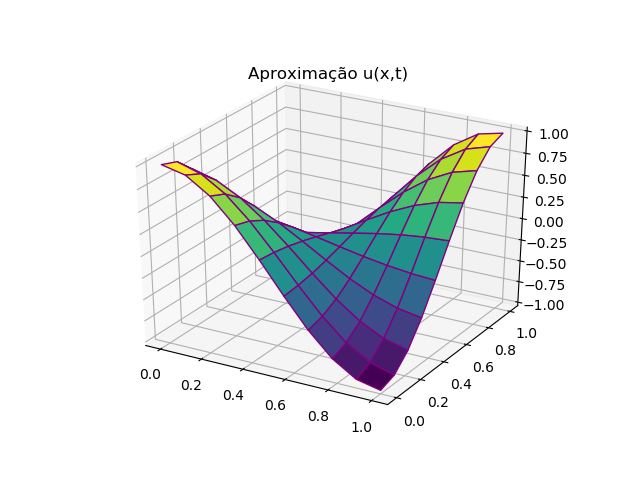

In [101]:
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt 
  
fig = plt.figure() 
  
# syntax for 3-D plotting 
ax = plt.axes(projection ='3d') 
  
# syntax for plotting 
ax.plot_surface(X, Y, u, cmap ='viridis', edgecolor ='purple') 
ax.set_title('Aproximação u(x,t)') 
plt.show() 

In [102]:
iterations = 0
stop = False

while(not stop):
    uprev = u.copy()
    for i in range(1, nx-1):
        for j in range(1, ny-1):
            u[i][j] = (1./4)*(u[i+1][j+1] + u[i-1][j-1] + u[i-1][j+1] + u[i+1][j-1] - 2*(delta**2)*f(x[i], y[j]))

    diffNorm = np.linalg.norm(u - uprev)

    if (diffNorm < tolerancia):
        stop = True
        success = True

    elif (iterations > maxIterations):
        stop = True
        
    else:
        iterations += 1

In [103]:
err = np.empty(nx)
sol = np.empty((nx, ny))

for i in range(nx):    
    for j in range(ny):
        sol[i][j] = manufaturada(x[i],y[j])
        
    err[i] = np.linalg.norm(u[i] - sol[i], 2)

In [104]:
max(err)

0.06383283215182183

In [105]:
iterations

14

In [81]:
X, Y = np.meshgrid(x, y)

<IPython.core.display.Javascript object>


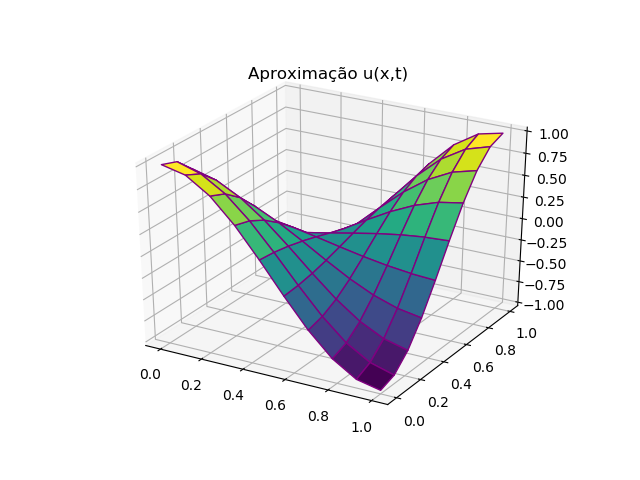

In [82]:
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt 
  
fig = plt.figure() 
  
# syntax for 3-D plotting 
ax = plt.axes(projection ='3d') 
  
# syntax for plotting 
ax.plot_surface(X, Y, u, cmap ='viridis', edgecolor ='purple') 
ax.set_title('Aproximação u(x,t)') 
plt.show() 

In [106]:
iterations = 0
stop = False

while(not stop):
    uprev = u.copy()
    for i in range(1, nx-1):
        for j in range(1, ny-1):
            firstTerm = (1./5)*(u[i+1][j] + u[i-1][j] + u[i][j+1] + u[i][j-1])
            secondTerm = (1./20)*(u[i+1][j+1] + u[i-1][j-1] + u[i-1][j+1] + u[i+1][j-1])
            thirdTerm =  (-(delta**2)/40)*(f(x[i+1], y[j]) + f(x[i-1], y[j]) 
                                           + f(x[i], y[j+1]) + f(x[i],y[j-1]) + 8*f(x[i], y[j]))
            u[i][j] = firstTerm + secondTerm + thirdTerm

    diffNorm = np.linalg.norm(u - uprev)

    if (diffNorm < tolerancia):
        stop = True
        success = True

    elif (iterations > maxIterations):
        stop = True
        
    else:
        iterations += 1

In [107]:
err = np.empty(nx)
sol = np.empty((nx, ny))

for i in range(nx):    
    for j in range(ny):
        sol[i][j] = manufaturada(x[i],y[j])
        
    err[i] = np.linalg.norm(u[i] - sol[i], 2)

In [108]:
max(err)

0.07280783770356267

In [109]:
iterations

17

In [88]:
X, Y = np.meshgrid(x, y)

<IPython.core.display.Javascript object>


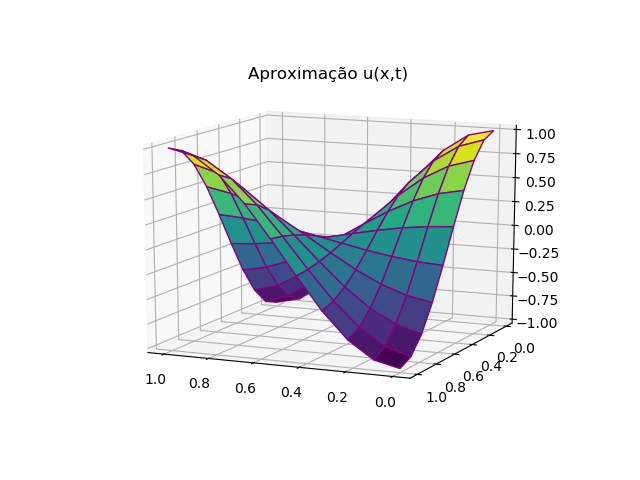

In [89]:
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt 
  
fig = plt.figure() 
  
# syntax for 3-D plotting 
ax = plt.axes(projection ='3d') 
  
# syntax for plotting 
ax.plot_surface(X, Y, u, cmap ='viridis', edgecolor ='purple') 
ax.set_title('Aproximação u(x,t)') 
plt.show() 